# Beginning
+ header
+ libraries
+ read in data 



In [1]:
##### Purpose:  featurize the sentences, and make a naive bayes classifier
##### Author: Julia Cope
##### Creation Date: 4/20/23
##### Project: A2 NLP - capturing climate claims 
##### Inputs: 
##### Inputs: 03_Outputs/05_df_embeddings.csv
##### Inputs: or 05_PR_embeddings.csv
##### Output: 
##### Output: 
##### Output: 

In [2]:
### libraries
import os
import pandas as pd
#from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np


In [3]:
## read in data

input_embeddings = pd.read_csv('03_Outputs/05_PR_embeddings.csv',parse_dates=['Date'])
del input_embeddings['climate_score']
del input_embeddings['likely']
del input_embeddings['sentences']

In [4]:
input_embeddings

,index,Date,company,ClimateLabel,Year,0,1,2,3,4,...,86,87,88,89,90,91,92,93,94,95
0,3843,2005-03-16,Chevron,0,2005,0.309939,0.141980,-0.191784,-0.188105,0.273713,...,-0.234393,0.286159,-0.412757,0.166489,-0.234323,0.054790,0.029755,0.466037,-0.196052,-0.046351
1,13600,2016-11-07,Chevron,0,2016,0.155654,-0.106823,-0.136258,0.037903,0.030329,...,-0.096739,-0.091970,-0.296058,-0.072454,-0.303351,-0.074717,0.425140,0.355230,-0.383906,0.230660
2,1655,2002-12-17,Exxon,1,2002,0.204244,0.082671,-0.226270,0.114879,0.360862,...,-0.250495,0.409908,-0.219396,0.102373,-0.126444,0.239538,0.388859,0.530417,-0.188089,0.069148
3,29025,2020-02-13,Exxon,0,2020,-0.629617,0.229901,0.174059,-0.633203,0.484790,...,-0.660066,0.349461,0.186338,-0.182403,-0.061577,0.083224,0.012385,-0.328546,-0.414355,0.513366
4,1401,2021-04-22,Phillips,0,2021,0.288818,-0.152301,-0.159354,0.068055,0.270615,...,0.301529,-0.055483,-0.230914,0.244344,-0.429978,0.097436,0.106731,0.351562,-0.311354,-0.279993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,25565,2020-08-11,Exxon,0,2020,0.315313,0.195400,-0.166126,-0.145939,0.078280,...,0.146353,0.169159,-0.408662,0.055267,-0.350171,0.022265,0.263818,0.600357,-0.329492,-0.049713
1796,20325,2019-05-08,Exxon,0,2019,-0.355919,-0.275823,-0.030519,0.313885,0.218265,...,0.120285,-0.008849,-0.741816,0.705888,-0.051089,-0.109460,1.121413,0.142682,0.197366,0.322712
1797,6198,2012-08-07,Chevron,0,2012,0.137159,-0.213025,-0.175486,-0.127100,0.149040,...,-0.044569,0.250843,-0.377645,0.612713,-0.017015,0.042939,0.662862,0.233327,-0.156714,0.059811
1798,24965,2021-01-20,Exxon,0,2021,-0.079713,-0.398540,-0.103079,0.076522,-0.147470,...,-0.006756,0.009018,-0.155902,0.246818,-0.276540,-0.020193,0.401389,0.374775,-0.123041,-0.136818


# Create Naive Bayes classifer for baseline

+ split the data 
+ calculate accuracy and F1 Score
+ look at ROC curve



In [5]:
#!pip install imblearn

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [7]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(input_embeddings.drop(['ClimateLabel','index','Date','Year','company'], axis=1), 
                                                    input_embeddings['ClimateLabel'], 
                                                    test_size=0.2, stratify=input_embeddings['ClimateLabel'])
# create SMOTE object
smote = SMOTE(random_state=7)

# fit and apply the SMOTE transformation to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# create Random Under-Sampling object
#rus = RandomUnderSampler(random_state=7)

# fit and apply the Random Under-Sampling transformation to the training data only
#X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# now you can use X_train_resampled and y_train_resampled for training your model


# now you can use X_train_resampled and y_train_resampled for training your model

##################################################
np.random.seed(7)
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
#gnb.fit(X_train_resampled, y_train_resampled)
gnb.fit(X_train, y_train)


# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate the model on the test set
accuracy = gnb.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"f1: {f1}")

Accuracy: 0.48055555555555557
f1: 0.6066695220625891


In [8]:
from collections import Counter

In [13]:
155+187+5+13


360

In [9]:
print(Counter(y_train))

Counter({0: 1367, 1: 73})


In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[161 181]
 [  6  12]]


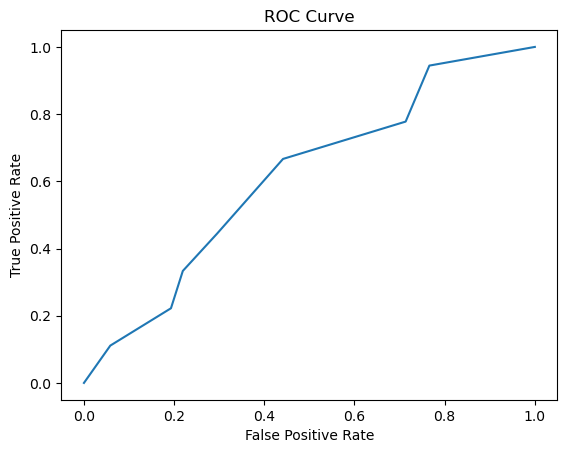

In [11]:


# Predict the probabilities of each class for the test set
y_probs = gnb.predict_proba(X_test)

# Vary the decision threshold and calculate the TPR and FPR for each threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
threshold_idxs = np.arange(0, len(thresholds), step=5)  # adjust the step value to change the granularity of the ROC curve
fpr = fpr[threshold_idxs]
tpr = tpr[threshold_idxs]
thresholds = thresholds[threshold_idxs]

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()